In [92]:
# importing dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dataset analysis

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [93]:
df = pd.read_csv('dataset.csv') # loading dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            974 non-null    int64  
 1   Gender                         974 non-null    object 
 2   Weight (kg)                    974 non-null    float64
 3   Height (m)                     974 non-null    float64
 4   Max_BPM                        974 non-null    int64  
 5   Avg_BPM                        974 non-null    int64  
 6   Resting_BPM                    974 non-null    int64  
 7   Session_Duration (hours)       974 non-null    float64
 8   Calories_Burned                974 non-null    float64
 9   Workout_Type                   974 non-null    object 
 10  Fat_Percentage                 974 non-null    float64
 11  Water_Intake (liters)          974 non-null    float64
 12  Workout_Frequency (days/week)  974 non-null    int

In [95]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [96]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,38.672485,73.903799,1.722803,179.889117,143.749487,62.212526,1.256191,905.231006,24.980801,2.626591,3.322382,1.810062,24.919754
std,12.179478,21.251967,0.127844,11.520928,14.347790,7.330616,0.342934,272.566838,6.257464,0.599864,0.912836,0.739338,6.661709
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.125000,1.620000,170.000000,131.000000,56.000000,1.040000,719.250000,21.300000,2.200000,3.000000,1.000000,20.112500
50%,40.000000,70.000000,1.710000,180.000000,143.000000,62.000000,1.260000,892.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.075000,1.800000,190.000000,156.000000,68.000000,1.457500,1075.750000,29.300000,3.100000,4.000000,2.000000,28.582500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [97]:
print('Dataset shape: ', str(df.shape))

Dataset shape:  (974, 15)


In [98]:
print(f'Number of duplicated instances: {df.duplicated().sum()}')

Number of duplicated instances: 1


In [99]:
print(f'Checking for null values: \n{str(df.isnull().sum())}')

Checking for null values: 
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [100]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000    -0.038258   -0.029317 -0.017464   
Weight (kg)                   -0.038258     1.000000    0.367759  0.057933   
Height (m)                    -0.029317     0.367759    1.000000 -0.016856   
Max_BPM                       -0.017464     0.057933   -0.016856  1.000000   
Avg_BPM                        0.036982     0.006984   -0.016784 -0.040252   
Resting_BPM                    0.005604    -0.035246   -0.007512  0.035971   
Session_Duration (hours)      -0.019305    -0.015153   -0.011341  0.009747   
Calories_Burned               -0.153965     0.093591    0.085005  0.001777   
Fat_Percentage                 0.001804    -0.223430   -0.234029 -0.008767   
Water_Intake (liters)          0.041552     0.393146    0.392870  0.031597   
Workout_Frequency (days/week)  0.007380    -0.010018   -0.009952 -0.028749   
Experience_Level              -0.018900     0.003964   -0.009802

<Axes: >

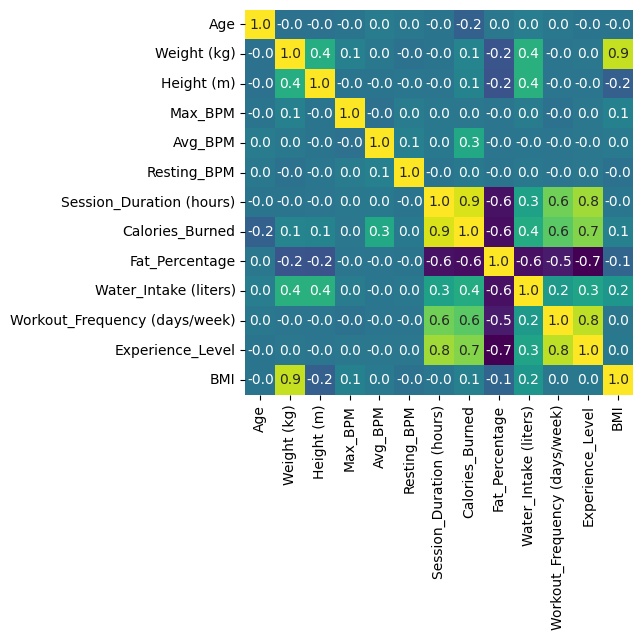

In [101]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cbar=None,cmap='viridis')

Unique values of labels

In [102]:
df['Age'].unique()

array([56, 46, 32, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 47, 55, 50,
       29, 42, 44, 59, 45, 33, 54, 24, 26, 35, 21, 31, 43, 37, 52, 34, 23,
       51, 27, 48, 58, 18, 22, 30, 49], dtype=int64)

In [103]:
df["BMI"].unique()

array([30.2 , 32.  , 24.71, 18.41, 14.39, 20.55, 23.76, 30.57, 32.34,
       30.07, 43.31, 17.89, 43.4 , 23.62, 35.93, 13.88, 27.34, 13.98,
       21.81, 26.96, 28.41, 22.95, 25.16, 38.16, 22.51, 21.78, 20.12,
       17.6 , 24.54, 27.64, 33.4 , 28.31, 19.37, 25.83, 27.84, 42.63,
       24.37, 33.14, 19.11, 17.77, 21.4 , 17.3 , 33.8 , 23.93, 40.1 ,
       15.31, 18.07, 23.17, 20.42, 33.61, 19.43, 27.18, 34.18, 32.69,
       22.78, 44.84, 28.35, 21.77, 20.86, 16.99, 22.45, 16.86, 32.93,
       17.11, 22.28, 25.89, 33.55, 20.88, 19.72, 39.12, 27.7 , 15.24,
       21.88, 35.86, 16.76, 18.15, 21.58, 33.16, 24.72, 17.27, 19.65,
       23.53, 28.87, 21.53, 19.42, 29.71, 22.89, 29.61, 29.53, 31.44,
       27.85, 22.31, 30.3 , 22.15, 40.71, 37.56, 26.05, 18.76, 15.7 ,
       22.61, 34.5 , 18.12, 17.54, 18.66, 23.09, 31.41, 29.87, 21.64,
       25.68, 25.81, 23.52, 23.74, 16.52, 30.52, 26.65, 24.16, 27.96,
       34.06, 29.26, 30.54, 29.95, 21.41, 17.88, 34.24, 22.43, 14.93,
       15.08, 45.43,

## Checking on labels

Encoding categorical columns

In [104]:
labelEncoder = LabelEncoder()

df["Workout_Type"] = labelEncoder.fit_transform(df["Workout_Type"])
df["Gender"] = labelEncoder.fit_transform(df["Gender"])

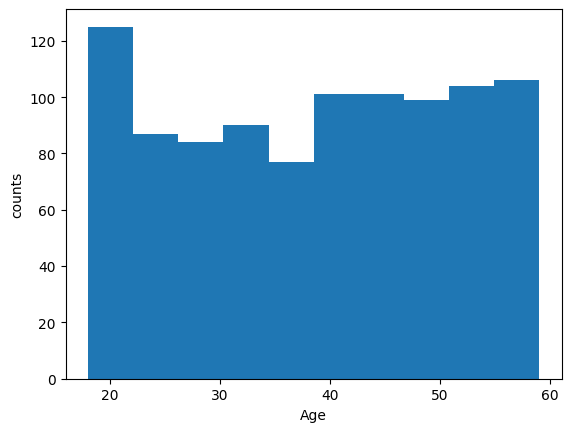

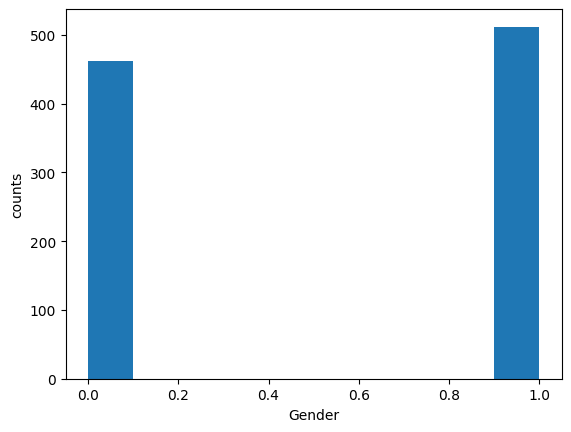

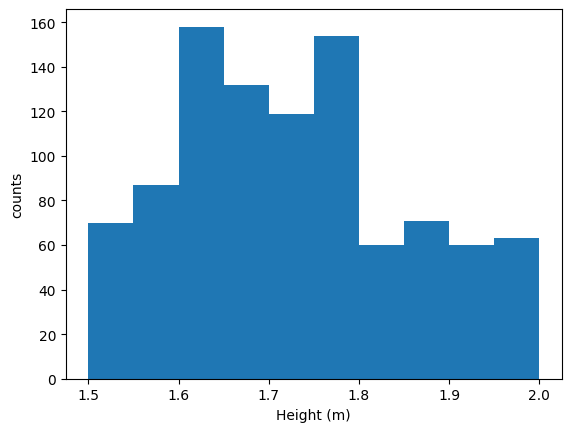

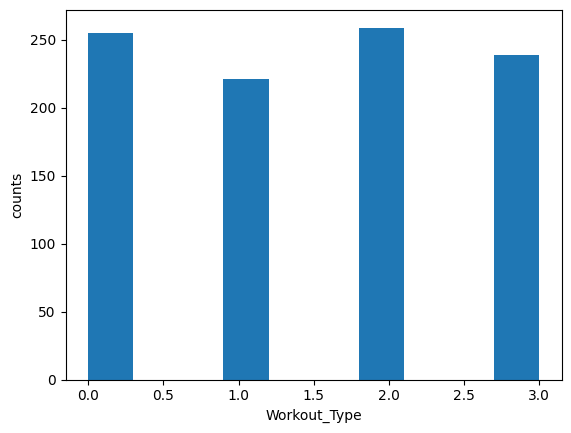

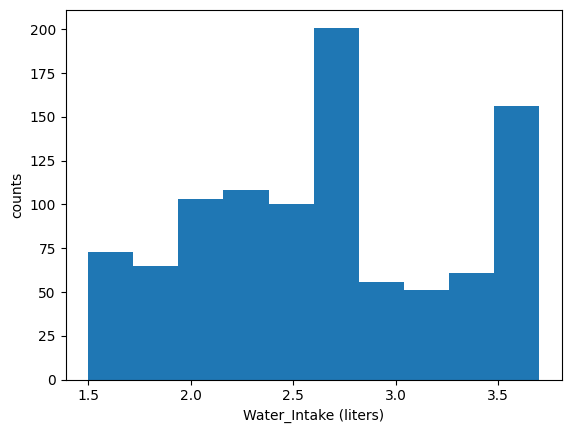

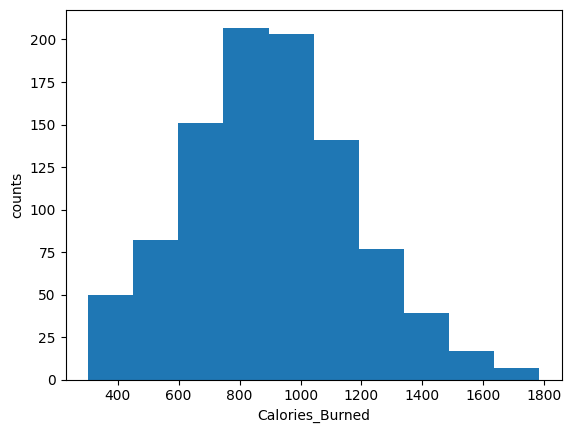

In [105]:
def plotColumnDistribution(df, column):
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('counts')
    plt.show()

plotColumnDistribution(df, 'Age')
plotColumnDistribution(df, 'Gender')
plotColumnDistribution(df, 'Height (m)')
plotColumnDistribution(df, 'Workout_Type')
plotColumnDistribution(df, 'Water_Intake (liters)')
plotColumnDistribution(df, 'Calories_Burned')

Building the dataset for training

In [106]:
X = df.drop("Workout_Type", axis=1)
y = df["Workout_Type"].values

In [107]:
X_std = X #StandardScaler().fit_transform(X)

Split dataset

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

In [109]:
y_test

array([0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 3, 0, 0, 3,
       0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 3, 2, 1, 3,
       0, 2, 0, 0, 1, 3, 1, 1, 0, 3, 2, 2, 3, 2, 3, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 2, 2, 3, 2, 1, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 2, 3, 1,
       0, 0, 3, 0, 1, 2, 1, 3, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0,
       3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 3, 2, 0, 3, 3, 0, 2, 3, 0, 1, 0,
       1, 2, 1, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 1, 3, 1,
       2, 1, 0, 0, 0, 3, 3, 3, 2, 1, 0, 1, 2, 2, 1, 3, 3, 3, 0, 2, 3, 0,
       1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 3, 1, 1, 2, 0, 0, 0, 2, 0])

Logistic regression classification

In [110]:
logisticRegModel = LogisticRegression(random_state=1)
logisticRegModel.fit(X_train, y_train)

c:\Users\blind\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [111]:
predictions = logisticRegModel.predict(X_test)

In [112]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.23      0.29        64
           1       0.30      0.07      0.11        44
           2       0.21      0.33      0.26        52
           3       0.15      0.29      0.20        35

    accuracy                           0.23       195
   macro avg       0.26      0.23      0.21       195
weighted avg       0.28      0.23      0.23       195



In [113]:
confusion_matrix(y_test,predictions)

array([[15,  1, 27, 21],
       [ 5,  3, 20, 16],
       [12,  4, 17, 19],
       [ 6,  2, 17, 10]], dtype=int64)

In [114]:
decisionTreeClassifierModel = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=1
)

# Fit the algorithm to the training data.
decisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=1)

In [115]:
predictions = decisionTreeClassifierModel.predict(X_test)

In [116]:
print(classification_report(y_test, predictions, zero_division=1))

              precision    recall  f1-score   support

           0       0.43      0.05      0.08        64
           1       1.00      0.00      0.00        44
           2       0.22      0.27      0.24        52
           3       0.18      0.66      0.29        35

    accuracy                           0.21       195
   macro avg       0.46      0.24      0.15       195
weighted avg       0.46      0.21      0.14       195



In [117]:
extraTreeClassifierModel = ExtraTreeClassifier(
    random_state=1
)

# Fit the algorithm to the training data.
extraTreeClassifierModel.fit(X_train, y_train)

ExtraTreeClassifier(random_state=1)

In [118]:
predictions = extraTreeClassifierModel.predict(X_test)

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.27      0.19      0.22        64
           1       0.25      0.30      0.27        44
           2       0.18      0.17      0.17        52
           3       0.15      0.20      0.17        35

    accuracy                           0.21       195
   macro avg       0.21      0.21      0.21       195
weighted avg       0.22      0.21      0.21       195



In [120]:
randomForestClassifierModel = RandomForestClassifier(
    random_state=1
)

# Fit the algorithm to the training data.
randomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [121]:
predictions = randomForestClassifierModel.predict(X_test)

predictions

array([0, 1, 1, 1, 0, 1, 0, 3, 3, 2, 1, 0, 3, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 1, 0, 0, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 0, 3, 1, 3, 3, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 3, 3, 2, 3, 2, 2, 3, 3,
       1, 2, 3, 3, 1, 2, 3, 2, 2, 1, 0, 1, 3, 2, 0, 0, 2, 1, 2, 0, 0, 1,
       2, 3, 3, 1, 2, 1, 3, 0, 2, 1, 2, 2, 3, 2, 0, 3, 2, 3, 1, 3, 0, 0,
       2, 3, 2, 2, 3, 2, 2, 0, 0, 2, 2, 3, 2, 2, 1, 2, 0, 2, 1, 3, 2, 0,
       2, 2, 3, 2, 2, 1, 3, 2, 1, 3, 2, 0, 2, 1, 0, 3, 1, 3, 2, 2, 2, 1,
       2, 3, 1, 0, 1, 2, 2, 2, 1, 0, 0, 3, 1, 0, 3, 2, 3, 0, 0, 1, 1, 3,
       2, 2, 2, 2, 3, 3, 1, 1, 0, 1, 2, 1, 3, 3, 0, 0, 1, 1, 2])

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.40      0.25      0.31        64
           1       0.22      0.20      0.21        44
           2       0.28      0.37      0.32        52
           3       0.21      0.29      0.24        35

    accuracy                           0.28       195
   macro avg       0.28      0.28      0.27       195
weighted avg       0.29      0.28      0.28       195

